# Allen Institute Dataset

## Load the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

## Get event-triggered responses
(from the "load_Allen_Visual_Behavior_from_pre_processed_file")

In [2]:
# @title Data retrieval
import os, requests

fname = "allen_visual_behavior_2p_change_detection_familiar_novel_image_sets.parquet"
url = "https://ndownloader.figshare.com/files/28470255"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

filename = "allen_visual_behavior_2p_change_detection_familiar_novel_image_sets.parquet"
data = pd.read_parquet(filename)

## EDA

In [3]:
data.sample(5)

,stimulus_presentations_id,cell_specimen_id,trace,trace_timestamps,mean_response,baseline_response,image_name,image_index,is_change,omitted,...,ophys_session_id,ophys_container_id,behavior_session_id,full_genotype,reporter_line,driver_line,indicator,sex,age_in_days,exposure_level
1698687,3601,1086497765,"[0.06973322480916977, -0.009180430322885513, 0...","[-1.2279264819932727, -1.1956126272039762, -1....",0.007027,0.000525,im063,4,True,False,...,963496285,969421516,963663505,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],GCaMP6f,M,176.0,novel
1134760,4525,1086668409,"[-0.15153589844703674, -0.11428346484899521, 0...","[-1.22809559045774, -1.195777285445694, -1.163...",0.027019,0.031420,im075,2,True,False,...,1001860744,999191979,1002219417,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],GCaMP6f,M,172.0,familiar
568782,3956,1086500756,"[-0.05675001069903374, 0.04280658811330795, 0....","[-1.2279363490103425, -1.1956222345627021, -1....",-0.015649,-0.025831,im035,7,True,False,...,993231283,991913246,993245074,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],GCaMP6f,F,127.0,familiar
129526,3680,1086497908,"[-0.02025872841477394, 0.04019847884774208, 0....","[-1.2281638329897349, -1.195843732121584, -1.1...",-0.011584,-0.016424,im106,1,True,False,...,994731371,991913453,994743822,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],GCaMP6f,M,199.0,familiar
740753,584,1086490839,"[-0.10947521775960922, -0.022503551095724106, ...","[-1.2281362613749274, -1.1958168860755871, -1....",-0.001519,-0.048529,omitted,8,False,True,...,992783847,989461845,992815106,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],GCaMP6f,M,145.0,familiar


##### Available data includes:
*   The cell `trace` aligned to stimulus (or omission) onset in a [-1.25, 1.5] second window around onset time
    *   Cell traces are in units of delta F/F, the change in fluorescence relative to baseline
*   The `trace_timestamps` for each trial, aligned to stimulus or omission onset
*   The `mean_response` on a given trial in a 500ms window after stimulus onset
*   The `baseline_response` on a given trial in a 500ms window before stimulus onset
*   The `image_name` for each trial. Trials where the stimulus was omitted have `image_name` = `omitted`
*   The `mean_running_speed` in a 500ms window after stimulus onset
*   The `mean_pupil_area` in a 500ms window after stimulus onset
*   The `response_latency` when the mouse licked after stimulus onset
*   Whether or not the trial was `rewarded`
*   Whether or not the trial `is_change`
*   Whether or not the trial was `omitted`

#### Cell and session level metadata includes:

*   The `stimulus_presentations_id` indicating the trial number within the session
*   The `cell_specimen_id` which is the unique identifier for each cell (note that a cell can be imaged in multiple sessions; if that's the case, the same cell_specimen_id appears in multiple sessions)
*   The `cre_line` indicating the cell type
  *   `Sst-IRES-Cre` labels SST inhibitory cells
  *   `Vip-IRES-Cre` labels VIP inhibitory cells
  *   `Slc17a7-IRES-Cre` labels excitatory cells
*   The `imaging_depth` indicating the cortical depth where the cell was located
*   The `targeted_structure` indicating the cortical area the cell was from
*   The `session_type` indicating the session order and image set
*   The `exposure_level` which tells you whether the image set was familiar or novel
*   The `mouse_id` indicating which mouse the cell came from
*   The `ophys_session_id` indicating the recording day for that trial
*   The `ophys_experiment_id` indicating which imaging plane within the session that the cell came from
*   The `ophys_container_id` which links the same imaging plane recorded across multiple sessions. Cells that are imaged across multiple sessions will have the same `cell_specimen_id`.

### Explore numeric data

In [4]:
# Some of those variables are categorical
data.describe().T

,count,mean,std,min,25%,50%,75%,max
stimulus_presentations_id,147695.0,2.487449e+03,1.391489e+03,0.000000e+00,1.298000e+03,2.533000e+03,3.704000e+03,4.806000e+03
cell_specimen_id,147695.0,1.086520e+09,4.012633e+04,1.086490e+09,1.086496e+09,1.086499e+09,1.086558e+09,1.086668e+09
mean_response,147695.0,2.464967e-02,1.425137e-01,-3.145396e-01,-1.265776e-02,3.610698e-03,2.317411e-02,4.824547e+00
baseline_response,147695.0,1.194441e-02,1.370972e-01,-3.119525e-01,-2.447653e-02,-3.305391e-03,1.813821e-02,5.105174e+00
image_index,147695.0,5.381943e+00,2.822989e+00,0.000000e+00,3.000000e+00,6.000000e+00,8.000000e+00,8.000000e+00
mean_running_speed,147695.0,1.005873e+01,1.407424e+01,-4.807640e+00,1.344832e-02,9.866249e-01,2.067402e+01,6.601865e+01
mean_pupil_area,143112.0,7.228063e+03,4.126755e+03,1.406638e+03,5.439896e+03,6.441778e+03,7.833153e+03,4.332184e+04
response_latency,31662.0,3.830791e-01,2.119689e-01,1.656000e-02,1.834700e-01,4.170000e-01,5.670800e-01,7.342900e-01
ophys_experiment_id,147695.0,9.866979e+08,2.001538e+07,9.344768e+08,9.686520e+08,9.938621e+08,1.004405e+09,1.010812e+09
imaging_depth,147695.0,2.152729e+02,4.904487e+01,1.750000e+02,1.750000e+02,1.750000e+02,2.750000e+02,2.750000e+02


#### NaN values in:

*mean_pupil_area* 
- For some samples filtering (blinks) and interpotlation might be necessary before the averaging. But for now, we should exclude the NaNs if needed.

*response latency*
- 78.5% of the samples contain NaNs. In those cases, the mouse doesn't licked after the stimulus onset. 

In [5]:
display(data.isna().sum(), data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147695 entries, 85 to 1709441
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   stimulus_presentations_id  147695 non-null  int64  
 1   cell_specimen_id           147695 non-null  int64  
 2   trace                      147695 non-null  object 
 3   trace_timestamps           147695 non-null  object 
 4   mean_response              147695 non-null  float64
 5   baseline_response          147695 non-null  float64
 6   image_name                 147695 non-null  object 
 7   image_index                147695 non-null  int64  
 8   is_change                  147695 non-null  bool   
 9   omitted                    147695 non-null  bool   
 10  mean_running_speed         147695 non-null  float64
 11  mean_pupil_area            143112 non-null  float64
 12  response_latency           31662 non-null   float64
 13  rewarded                   

stimulus_presentations_id         0
cell_specimen_id                  0
trace                             0
trace_timestamps                  0
mean_response                     0
baseline_response                 0
image_name                        0
image_index                       0
is_change                         0
omitted                           0
mean_running_speed                0
mean_pupil_area                4583
response_latency             116033
rewarded                          0
ophys_experiment_id               0
imaging_depth                     0
targeted_structure                0
cre_line                          0
session_type                      0
session_number                    0
mouse_id                          0
ophys_session_id                  0
ophys_container_id                0
behavior_session_id               0
full_genotype                     0
reporter_line                     0
driver_line                       0
indicator                   

None

##### So, mice don't lick in 21.5% of the samples - even if there was a chance of 58% to be rewarded for change detection.

In [6]:
data.is_change[data.is_change == True].count() / len(data.is_change) * 100

58.20237651917803

#### Check categorical variables

In [7]:
print('exposure_levels:', data.exposure_level.unique())
print('stimulus presentations can be changes:', data.is_change.unique())
print('stimulus presentations can be omitted:', data.omitted.unique())
print('cre lines (cell types) included in this dataset are:', data.cre_line.unique())
print('there are', len(data.mouse_id.unique()), 'mice in this dataset')
print('there are', len(data.ophys_session_id.unique()), 'sessions in this dataset')

exposure_levels: ['familiar' 'novel']
stimulus presentations can be changes: [ True False]
stimulus presentations can be omitted: [False  True]
cre lines (cell types) included in this dataset are: ['Sst-IRES-Cre' 'Vip-IRES-Cre']
there are 13 mice in this dataset
there are 25 sessions in this dataset


### Get trials where the image identity changed, for SST and VIP cells

In [13]:
# mean response - baseline response for familiar and novel conditions

# Get trials where the image identity changed, for SST and VIP cells
sst_data = data[(data.cre_line == 'Sst-IRES-Cre')&(data.is_change == True)]
vip_data = data[(data.cre_line == 'Vip-IRES-Cre')&(data.is_change == True)]

# More data for SST than VIP neurons
display("More data for SST than VIP neurons",sst_data.shape, vip_data.shape)
sst_data.sample(5)

'More data for SST than VIP neurons'

(34350, 31)

(51612, 31)

,stimulus_presentations_id,cell_specimen_id,trace,trace_timestamps,mean_response,baseline_response,image_name,image_index,is_change,omitted,...,ophys_session_id,ophys_container_id,behavior_session_id,full_genotype,reporter_line,driver_line,indicator,sex,age_in_days,exposure_level
687264,2414,1086490561,"[0.0029524383135139942, 0.00898408517241478, 0...","[-1.2278459028873827, -1.1955341686008727, -1....",-0.019756,-0.010218,im035,7,True,False,...,957189583,941373529,957331258,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],GCaMP6f,F,151.0,familiar
83256,120,1086498820,"[2.532707691192627, 2.1681394577026367, 1.6981...","[-1.2281638329897349, -1.195843732121584, -1.1...",1.059232,1.320116,im054,5,True,False,...,994731371,991913453,994743822,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],GCaMP6f,M,199.0,familiar
147528,211,1086496500,"[0.06547749042510986, 0.21472397446632385, 0.0...","[-1.228177527630313, -1.195857066376884, -1.16...",0.042414,-0.018629,im065,0,True,False,...,994883056,991913453,994894518,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],GCaMP6f,M,200.0,novel
83935,173,1086497908,"[-0.08523073047399521, 0.01309830229729414, 0....","[-1.2281638329897349, -1.195843732121584, -1.1...",0.010673,-0.025608,im073,3,True,False,...,994731371,991913453,994743822,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],GCaMP6f,M,199.0,familiar
708323,3584,1086490519,"[0.06514547020196915, 0.08083510398864746, 0.0...","[-1.2278459028873827, -1.1955341686008727, -1....",0.004856,-0.030917,im045,4,True,False,...,957189583,941373529,957331258,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],GCaMP6f,F,151.0,familiar


## Mean and baseline responses of SST and VIP cells
### SST neurons

In [14]:
display(
    "Mean responses", sst_data.groupby('exposure_level').mean_response.describe(),
    "Baseline responses", sst_data.groupby('exposure_level').baseline_response.describe())

# fig, ax = plt.subplots()
# bp = ax.boxplot(sst_data.groupby('exposure_level').mean_response.apply(list), vert = 0)
# ax.set_title('Mean responses')
# ax.set_xlabel('')
# ax.set_yticklabels(sst_data['exposure_level'].unique())
# plt.show()

'Mean responses'

,count,mean,std,min,25%,50%,75%,max
exposure_level,,,,,,,,
familiar,25380.0,0.033139,0.089937,-0.177685,-0.003469,0.013887,0.040715,2.603411
novel,8970.0,0.024416,0.139702,-0.163174,-0.007708,0.005812,0.020691,2.503540


'Baseline responses'

,count,mean,std,min,25%,50%,75%,max
exposure_level,,,,,,,,
familiar,25380.0,-0.015448,0.070200,-0.311952,-0.041964,-0.016569,0.005402,1.693336
novel,8970.0,0.000485,0.101911,-0.252378,-0.025928,-0.006735,0.011221,2.194097


In [ ]:
# Add mean minus baseline to the data frames
sst_data['mean_minus_basline_response'] = sst_data.mean_response - sst_data.baseline_response
vip_data['mean_minus_basline_response'] = vip_data.mean_response - vip_data.baseline_response

'Corrected responses'

,count,mean,std,min,25%,50%,75%,max
exposure_level,,,,,,,,
familiar,25380.0,0.048587,0.098204,-0.761598,-0.000377,0.029400,0.072620,1.775442
novel,8970.0,0.023932,0.112501,-0.864084,-0.011137,0.011326,0.037256,1.933909


<Axes: xlabel='exposure_level', ylabel='mean_minus_basline_response'>

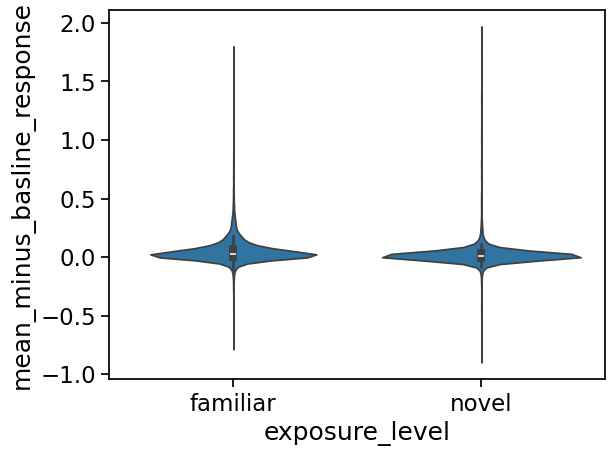

In [27]:
display("Corrected responses", sst_data.groupby('exposure_level').mean_minus_basline_response.describe())

# Violin plots
sns.violinplot(data=sst_data, x="exposure_level", y="mean_minus_basline_response")

In [ ]:
##TODO: 
# - separate this per session in familiar and novel conditions
# - save the mean-baseline response for each of the familiar and novel sessions
